In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Library
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

## The Data

In [5]:
Churn = pd.read_csv('C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Logistic Regression\\Churn_Modelling.csv')#,index_col='RowNumber')
Churn.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

## Data Cleaning

In [5]:
to_drop=['RowNumber','CustomerId','Surname']
Churn=Churn.drop(to_drop,axis=1)
Churn.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
Churn.info()

In [ ]:
Gender = pd.get_dummies(Churn['Gender'],drop_first=True)
Geo = pd.get_dummies(Churn['Geography'],drop_first=True)

In [ ]:
Churn.drop(['Gender','Geography'],axis=1,inplace=True)

In [ ]:
Churn = pd.concat([Churn,Gender,Geo],axis=1)
Churn.head()

In [ ]:
#Churn.CreditScore = np.log(Churn.CreditScore)
#Churn.Age = np.sqrt(Churn.Age)

In [ ]:
Churn.shape

In [ ]:
Churn.head()

In [ ]:
#Churn.Exited=Churn['Exited'].astype('category')

# Building a  model
## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = Churn.drop('Exited',axis=1)
y = Churn['Exited']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [28]:
# Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier(min_samples_split=20)#max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
print(accuracy_score(y_test, y_pred))

DecisionTreeClassifier(min_samples_split=20)
0.8316666666666667


In [29]:
from sklearn.metrics import classification_report, roc_auc_score

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2378
           1       0.60      0.56      0.58       622

    accuracy                           0.83      3000
   macro avg       0.74      0.73      0.74      3000
weighted avg       0.83      0.83      0.83      3000



In [31]:
roc_auc_score(y_test, y_pred)

0.7311725381917308

In [32]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot 
features = list(Churn.columns[Churn.columns != 'Exited'])
features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Male',
 'Germany',
 'Spain']

In [33]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2378
           1       0.60      0.56      0.58       622

    accuracy                           0.83      3000
   macro avg       0.74      0.73      0.74      3000
weighted avg       0.83      0.83      0.83      3000



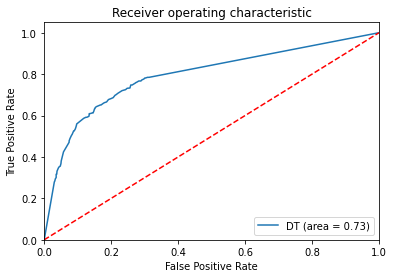

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [38]:
clf.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.21052632, 0.78947368],
       ...,
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.3       , 0.7       ]])

In [39]:
len(Churn.columns)

12

In [43]:
#Fit a Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_features=4,
                             max_depth=10,min_samples_split=20) #max_features=4
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8696666666666667

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.80      0.49      0.61       622

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000



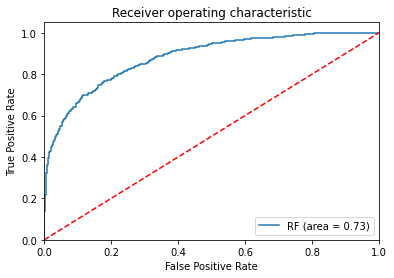

In [44]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [45]:
# Fit a AdaBoost model
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(clf)

0.86
AdaBoostClassifier(learning_rate=0.3, n_estimators=100)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.48      0.58       622

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



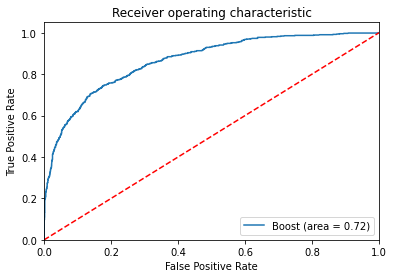

In [46]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Boost_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Boost (area = %0.2f)' % Boost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [47]:
#Fit a Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100)#,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(clf)

0.867
GradientBoostingClassifier()


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.78      0.50      0.61       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



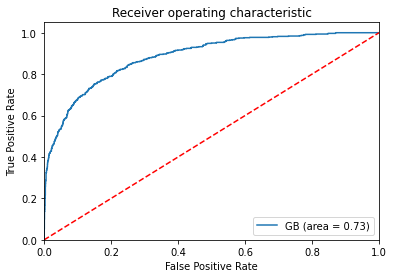

In [48]:
print(classification_report(y_test,y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GB_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [49]:
pd.DataFrame(X.columns, clf.feature_importances_).sort_index(0)

0
0.000300            Spain
0.000328        HasCrCard
0.005440           Tenure
0.012765             Male
0.015876  EstimatedSalary
0.025420      CreditScore
0.053816          Germany
0.076898          Balance
0.113356   IsActiveMember
0.315278    NumOfProducts
0.380524              Age

In [50]:
round(sum(clf.feature_importances_))

1